In [1]:
import numpy as np

In [2]:
test = []
with open('test.txt', 'r') as f:
    content = f.readlines()
    test = [x.split() for x in content]
    test = [(float(x[0]), float(x[1])) for x in test]

In [3]:
content = []
with open('train.txt', 'r') as f:
    content = f.readlines()
train = [x.split() for x in content]
train = [(float(x[0]), float(x[1])) for x in train]

In [4]:
def w_star(X, lam, t):
    firstFactor = (np.matmul(X, X.transpose()) + lam*np.identity(X.shape[0]))
    secondFactor = X.dot(t).transpose()
    return np.linalg.solve(firstFactor, secondFactor)

In [5]:
lams = [pow(10, -i) for i in range(0, 6)]

In [6]:
from random import shuffle
def trainValidationSplit(data):
    shuffle(data)
    split = []
    for i in range(10):
        split.append(data[2*i:2*i + 1])
    return split

In [7]:
dataSplit = trainValidationSplit(train)

In [8]:
def generateMatrices(dataSplit):
    pairs = []
    for i in range(10):
        trainingPartitions = dataSplit[:i] + dataSplit[i+1:]
        trainingData = sum(trainingPartitions, [])
        [xs, t] = zip(*trainingData)
        X = np.transpose(np.matrix([[pow(x, i) for i in range(0, 20)] for x in xs]))
        pairs += [(X, t)]
    return pairs

In [9]:
matrices = generateMatrices(dataSplit)

In [10]:
def score(weights, data, lam):
    (xs, ts) = zip(*data)
    predictions = [weights[i] * pow(x, i) for x in xs]
    squaredErrors = map(lambda x: np.asscalar((x[0] - x[1])*(x[0] - x[1])), zip(predictions, ts))
    return pow(sum(squaredErrors)/len(ts), .5)

In [11]:
validationError = [[np.inf for y in range(10)] for x in range(6)]

for i in range(10):
    for j, lam in enumerate(lams):
        if (dataSplit[i] == []):
            continue
        w = w_star(matrices[i][0], lam, matrices[i][1])
        #print(w)
        RMSError = score(w, dataSplit[i], lam)
        print(str(i) + ", " + str(lam) + ", " + str(RMSError))
        validationError[j][i] = RMSError
        

0, 1, 1.9042604697268521
0, 0.1, 1.3126917440865375
0, 0.01, 1.088078331188958
0, 0.001, 0.7875486479659948
0, 0.0001, 0.22396761121794606
0, 1e-05, 1.590393612264084
1, 1, 3.3701526367381045
1, 0.1, 3.2615541756969915
1, 0.01, 3.116750979598209
1, 0.001, 2.754580801432306
1, 0.0001, 0.4018750922471468
1, 1e-05, 1.099911056685643
2, 1, 39.245044142304444
2, 0.1, 25.26352599307002
2, 0.01, 25.0898291088813
2, 0.001, 9.031800953261108
2, 0.0001, 7.448644983066865
2, 1e-05, 6.920757856280121
3, 1, 14.88325493711598
3, 0.1, 134.85999723264007
3, 0.01, 222.8869526165048
3, 0.001, 272.49443573538673
3, 0.0001, 443.36696956110103
3, 1e-05, 367.89476734316054
4, 1, 455.732097231772
4, 0.1, 4072.4450560508258
4, 0.01, 5623.642704239605
4, 0.001, 10595.223448767621
4, 0.0001, 4596.686449868435
4, 1e-05, 1847.0398338697935
5, 1, 2257.8159362644637
5, 0.1, 8186.778913181219
5, 0.01, 6510.554635491788
5, 0.001, 24710.224675140802
5, 0.0001, 39940.32930849684
5, 1e-05, 304989.5466395546
6, 1, 29625.

In [18]:
[len (x) for x in validationError]

[10, 10, 10, 10, 10, 10]

In [12]:
[np.mean(x) for x in validationError]

[46212.370169661597,
 158709.07182068165,
 414053.34894288704,
 28358.974235892507,
 12241.0938681773,
 41929.704243629836]

In [13]:
[X, t] = zip(*train)
X = np.matrix([[pow(x, i) for i in range(20)] for x in X]).transpose()

In [14]:
w = w_star(X, .0001, t)

In [15]:
%matplotlib notebook
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


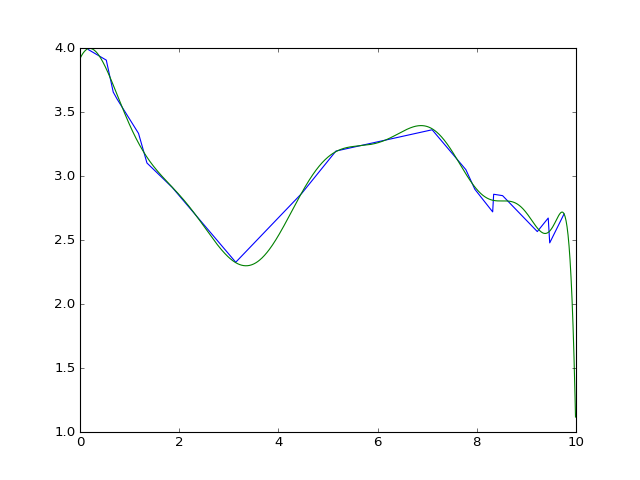

In [17]:
[xs, ts] = zip(*sorted(train))
plt.plot(xs, ts, color='b')
def f(x):
    retval = np.dot([pow (x, i) for i in range(20)], w)
    return np.asscalar(retval)
plt.plot([x / 100 for x in range(0, 1000)], [f(x / 100) for x in range(0, 1000)], color='g')
plt.savefig('prediction.png')
plt.show()

In [21]:
train

[(9.22, 2.5658),
 (8.52, 2.8465),
 (1.35, 3.1015),
 (8.34, 2.8574),
 (9.76, 2.7043),
 (4.47, 2.8639),
 (7.96, 2.8967),
 (1.18, 3.3328),
 (7.1, 3.3612),
 (7.78, 3.0493),
 (9.44, 2.6716),
 (0.67, 3.6556),
 (5.16, 3.1949),
 (1.86, 2.9105),
 (0.75, 3.5996),
 (8.32, 2.7196),
 (9.47, 2.4775),
 (3.14, 2.3263),
 (0.17, 3.9871),
 (0.53, 3.9053)]

In [39]:
w

matrix([[ -1.83833664e+03],
        [  7.92417165e+02],
        [ -1.34268793e+02],
        [  1.46720057e+01],
        [ -1.54072131e+00],
        [  1.12541232e-01],
        [  9.32096504e-04],
        [ -1.02833175e-04],
        [  1.98563503e-04],
        [ -1.09863933e-04],
        [ -1.02797640e-05],
        [  1.84506280e-05],
        [ -1.05712743e-05],
        [  3.65481628e-06],
        [ -6.84638621e-07],
        [  6.05958803e-08],
        [ -4.07903045e-10],
        [ -3.72987530e-10],
        [  2.84858907e-11],
        [ -6.87235425e-13]])